# Analysis on Delivery Orders (August 2020 - July 2021)


Table of Contents
Executive Summary
Introduction
Methodology 
Results
Findings and Implications
Conclusion
Appendix

This project visualizes datasets retreived from three restaurants (i.e. "A", "B", and "C") that used my delivery service between August 2020 and July 2021. The datasets contain basic information such as sales record and customer info. The goal is to extract new metrics and discover unknown patterns about the customer behavior. So this project will heavily use data manipulation library, Pandas, to see the raw data from a different perspective. Furthermore, data from websites will be webscraped to backup insights found throughout the analysis. 

The project will focus on finding possible answers to the following questions:

    1. Is there a general trend among the three restaurants? 
    2. How valuable are repeating customers in terms of profitability?
    3. Is there a relationship between frequency of orders and customer demographics? 
    4. What ways could the delivery service be optimized?

Before diving into the analysis, the first step is to prepare the data; merge the individual CSV files to create a cumulative dataframe. 

In [1]:
#Import libraries
import pandas as pd
import os
import glob
import seaborn as sns
import folium
from folium import plugins
import branca
import squarify
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Specify the file path to find all relevant files
joined_files = os.path.join('C:\\Users\\hirok\\Desktop\\', 'restaurant*.csv')

In [3]:
#Merge the files
joined_list = glob.glob(joined_files)

In [4]:
#Create a dataframe
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)

# Snapshots of the Dataset

In [5]:
#Top 10 rows and columns of df
df.head(10)

,Restaurant,First Name,Last Name,Full Name,Date Ordered,Month,Zip Code,Shift,Day,Week Number,Repeater,Revenue
0,A,Joanna,L,Joanna L,8/2/2020,August,95070,Lunch,Sunday,8/2-8/8,False,$225.42
1,A,Jing,T,Jing T,8/3/2020,August,95129,Dinner,Monday,8/2-8/8,False,$66.18
2,A,Mike,D,Mike D,8/3/2020,August,95117,Dinner,Monday,8/2-8/8,False,$67.36
3,A,Taian,C,Taian C,8/3/2020,August,95070,Lunch,Monday,8/2-8/8,False,$75.22
4,A,Daniel,A,Daniel A,8/6/2020,August,95112,Lunch,Thursday,8/2-8/8,False,$309.87
5,A,Linda,L,Linda L,8/6/2020,August,95051,Lunch,Thursday,8/2-8/8,False,$43.85
6,A,Akira,M,Akira M,8/7/2020,August,95051,Dinner,Friday,8/2-8/8,False,$56.42
7,A,Sujin,K,Sujin K,8/7/2020,August,95014,Dinner,Friday,8/2-8/8,False,$68.60
8,A,Taian,C,Taian C,8/7/2020,August,95070,Lunch,Friday,8/2-8/8,True,$70.40
9,A,Yi-Ann,C,Yi-Ann C,8/7/2020,August,95008,Lunch,Friday,8/2-8/8,False,$67.82


In [6]:
#Bottom ten rows 
df.tail(10)

,Restaurant,First Name,Last Name,Full Name,Date Ordered,Month,Zip Code,Shift,Day,Week Number,Repeater,Revenue
5977,C,Ami,W,Ami W,7/28/2021,July,94086,Lunch,Wednesday,7/25-7/31,True,$14.50
5978,C,Chris,C,Chris C,7/28/2021,July,94024,Dinner,Wednesday,7/25-7/31,True,$48.50
5979,C,Clint,G,Clint G,7/28/2021,July,94089,Dinner,Wednesday,7/25-7/31,True,$26.50
5980,C,James,P,James P,7/28/2021,July,94043,Dinner,Wednesday,7/25-7/31,True,$45.00
5981,C,Mehdi,L,Mehdi L,7/28/2021,July,94024,Lunch,Wednesday,7/25-7/31,True,$39.50
5982,C,Alex,W,Alex W,7/29/2021,July,94086,Lunch,Thursday,7/25-7/31,False,$79.50
5983,C,Jennifer,Z,Jennifer Z,7/29/2021,July,94041,Dinner,Thursday,7/25-7/31,True,$41.50
5984,C,Lily,N,Lily N,7/29/2021,July,94085,Dinner,Thursday,7/25-7/31,True,$33.50
5985,C,Matthew,W,Matthew W,7/29/2021,July,94086,Lunch,Thursday,7/25-7/31,True,$81.00
5986,C,Rikin,M,Rikin M,7/29/2021,July,94086,Dinner,Thursday,7/25-7/31,True,$65.50


In [7]:
#Identify the total number of rows and columns, as well as the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5987 entries, 0 to 5986
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Restaurant    5987 non-null   object
 1   First Name    5987 non-null   object
 2   Last Name     5987 non-null   object
 3   Full Name     5987 non-null   object
 4   Date Ordered  5987 non-null   object
 5   Month         5987 non-null   object
 6   Zip Code      5987 non-null   int64 
 7   Shift         5987 non-null   object
 8   Day           5987 non-null   object
 9   Week Number   5987 non-null   object
 10  Repeater      5987 non-null   bool  
 11  Revenue       5987 non-null   object
dtypes: bool(1), int64(1), object(10)
memory usage: 520.5+ KB


After merging the CSV files, there are 12 columns and 5,987 rows in the DataFrame. Ten columns are objects and two columns are non-objects (i.e. int and boolean). Since the datasets were initially CSV files, it doesn't follow the correct formatting for Python. In addition, certain columns have the wrong data type, which could lead to an error later on in the analysis. So the next step will focus on restructuring the data and have Python search for plausible errors hidden in the DataFrame. 

# Data Wrangling

In [8]:
#List the initial columns
df.columns

Index(['Restaurant', 'First Name', 'Last Name', 'Full Name', 'Date Ordered',
       'Month', 'Zip Code', 'Shift', 'Day', 'Week Number', 'Repeater',
       'Revenue'],
      dtype='object')

In [9]:
#Drop the columns that are irrelevant
df.drop(['First Name', 'Last Name', 'Shift', 'Day', 'Week Number'], axis=1, inplace=True)

In [10]:
#Rename columns to follow correct formatting
df.rename(columns={'Full Name':'Full_Name', 'Date Ordered':'Date_Ordered', 'Zip Code':'Zip_Code'}, inplace=True)

In [11]:
#Review the updated columns
df.columns

Index(['Restaurant', 'Full_Name', 'Date_Ordered', 'Month', 'Zip_Code',
       'Repeater', 'Revenue'],
      dtype='object')

In [12]:
#Convert 'Date_Ordered' column to datetime
df['Date_Ordered'] = pd.to_datetime(df['Date_Ordered'], format='%m/%d/%Y')

In [13]:
#Remove "$" from "Revenue" column
df.Revenue = [x[1:] for x in df.Revenue]

In [14]:
#Convert "Revenue" column to float
df['Revenue'] = df['Revenue'].astype(float)

In [15]:
#Check the updated data types
df.dtypes

Restaurant              object
Full_Name               object
Date_Ordered    datetime64[ns]
Month                   object
Zip_Code                 int64
Repeater                  bool
Revenue                float64
dtype: object

The updated dataset has seven columns in total; three columns as objects, one datetime, one int, one float, and one bool. Within the dataset, however, there could be rows with duplicates or missing values. 

Let's go ahead and clean the data.

In [16]:
#Find the number of duplicates
df.duplicated().sum()

5

In [17]:
#Check the duplicates
df[df.duplicated(keep=False)]

,Restaurant,Full_Name,Date_Ordered,Month,Zip_Code,Repeater,Revenue
437,A,Qi H,2020-11-10,November,95014,True,65.6
438,A,Qi H,2020-11-10,November,95014,True,65.6
2183,A,Jianzhi W,2021-04-24,April,95130,True,41.5
2184,A,Jianzhi W,2021-04-24,April,95130,True,41.5
2682,A,Jianzhi W,2021-06-15,June,95130,True,41.5
2683,A,Jianzhi W,2021-06-15,June,95130,True,41.5
5379,C,Ami W,2021-02-18,February,94086,True,14.5
5380,C,Ami W,2021-02-18,February,94086,True,14.5
5584,C,Sharmin N,2021-04-07,April,94086,False,62.5
5585,C,Sharmin N,2021-04-07,April,94086,False,62.5


In [18]:
#Remove the duplicate row(s)
df.drop_duplicates(inplace=True)

In [19]:
#Verify if duplicates were dropped
df.duplicated().sum()

0

In [20]:
#Search for missing values
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print()

Restaurant
False    5982
Name: Restaurant, dtype: int64

Full_Name
False    5982
Name: Full_Name, dtype: int64

Date_Ordered
False    5982
Name: Date_Ordered, dtype: int64

Month
False    5982
Name: Month, dtype: int64

Zip_Code
False    5982
Name: Zip_Code, dtype: int64

Repeater
False    5982
Name: Repeater, dtype: int64

Revenue
False    5982
Name: Revenue, dtype: int64



In [21]:
#Observe the updated dataframe
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5982 entries, 0 to 5986
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Restaurant    5982 non-null   object        
 1   Full_Name     5982 non-null   object        
 2   Date_Ordered  5982 non-null   datetime64[ns]
 3   Month         5982 non-null   object        
 4   Zip_Code      5982 non-null   int64         
 5   Repeater      5982 non-null   bool          
 6   Revenue       5982 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 333.0+ KB
None


,Restaurant,Full_Name,Date_Ordered,Month,Zip_Code,Repeater,Revenue
0,A,Joanna L,2020-08-02,August,95070,False,225.42
1,A,Jing T,2020-08-03,August,95129,False,66.18
2,A,Mike D,2020-08-03,August,95117,False,67.36
3,A,Taian C,2020-08-03,August,95070,False,75.22
4,A,Daniel A,2020-08-06,August,95112,False,309.87
5,A,Linda L,2020-08-06,August,95051,False,43.85
6,A,Akira M,2020-08-07,August,95051,False,56.42
7,A,Sujin K,2020-08-07,August,95014,False,68.60
8,A,Taian C,2020-08-07,August,95070,True,70.40
9,A,Yi-Ann C,2020-08-07,August,95008,False,67.82


The post-processed DataFrame has seven columns and 5982 rows. Since the columns mainly consist of qualitative data, it limits the descriptive statistics that can be calculated. Hence, the next section will focus on calculating quantitative data based on the information available. 

# Data Analysis - Convert Qualitative Data to Quantitative Data

In [22]:
#Make individual DataFrames for each restaurant
df_resA = df[(df['Restaurant'] == 'A')]
df_resB = df[(df['Restaurant'] == 'B')]
df_resC = df[(df['Restaurant'] == 'C')]

In [23]:
#Assign variables that will be used for loop
months = df['Month'].unique() 
df_res = [df_resA, df_resB, df_resC]
revenue = []
revenuelist = []

#Create lists of restaurants' revenues          
for r in range(len(df_res)):
    revenuetest = df_res[r][['Month', 'Revenue']]
    revenuetest = revenuetest.groupby(['Month'], sort=False, as_index=True).sum()
    revenue.append(revenuetest)
    revenuelist.append([])
    i = len(months) - len(revenuetest.index)
    for x in months:
        if x == months[i]:
            rev = revenue[r].loc[x, 'Revenue']
            i = i+1
        else:
            rev = 0
        revenuelist[r].append(rev) 

revenueA = revenuelist[0]
revenueB = revenuelist[1]
revenueC = revenuelist[2]
print("A:", revenueA)
print("B:", revenueB)
print("C:", revenueC)

A: [5532.7, 7319.66, 11532.08, 13653.61, 18216.51, 23397.91, 20949.1, 22197.5, 17989.54, 19683.95, 14222.32, 11430.78]
B: [0, 4091.51, 7592.59, 8945.67, 12070.79, 12894.73, 14075.48, 14934.99, 13777.28, 12524.43, 11668.08, 10915.97]
C: [0, 0, 0, 0, 4298.09, 5295.85, 5620.4, 5871.95, 5955.9, 5397.9, 4019.65, 4056.9]


In [24]:
#Find the monthly delivery count and create a list for each restaurant
deliveryct = []
deliveryctlist = []

for r in range(len(df_res)):
    orderct = df_res[r][['Month', 'Revenue']].groupby(['Month'], sort=False, as_index=True).count()
    deliveryct.append(orderct)
    deliveryctlist.append([])
    i = len(months) - len(orderct.index)
    for x in months:
        if x == months[i]:
            dct = deliveryct[r].loc[x, 'Revenue']
            i = i+1
        else:
            dct = 0
        deliveryctlist[r].append(dct)

deliveryctA = deliveryctlist[0]
deliveryctB = deliveryctlist[1]
deliveryctC = deliveryctlist[2]
print("A:", deliveryctA)
print("B:", deliveryctB)
print("C", deliveryctC)

A: [75, 120, 162, 211, 267, 364, 357, 379, 312, 319, 228, 181]
B: [0, 82, 119, 158, 191, 222, 235, 254, 233, 222, 197, 182]
C [0, 0, 0, 0, 96, 117, 131, 139, 133, 120, 92, 84]


In [25]:
#Sum the monthly revenue of Repeaters and Non-Repeaters for each restaurant, and create lists
reprev = []
nonreprev = []

for r in range(len(df_res)):
    reprev.append([])
    nonreprev.append([])
    for x in months:
        repeater = df_res[r][(df_res[r]['Month']==x) & df_res[r]['Repeater']==True].sum()['Revenue'].round(2)
        reprev[r].append(repeater)
        nonrepeater = df_res[r][(df_res[r]['Month']==x) & (df_res[r]['Repeater']==False)].sum()['Revenue'].round(2)
        nonreprev[r].append(nonrepeater)

reprevA = reprev[0]
reprevB = reprev[1]
reprevC = reprev[2]
nonreprevA = nonreprev[0]
nonreprevB = nonreprev[1]
nonreprevC = nonreprev[2]
print("Repeaters Groups (Revenue)")
print("A:", reprevA)
print("B:", reprevB)
print("C:", reprevC)
print()
print("Non-repeater Groups (Revenue)")
print("A:", nonreprevA)
print("B:", nonreprevB)
print("C:", nonreprevC)

C:\Users\hirok\AppData\Local\Temp\ipykernel_9824\1517568085.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  repeater = df_res[r][(df_res[r]['Month']==x) & df_res[r]['Repeater']==True].sum()['Revenue'].round(2)
C:\Users\hirok\AppData\Local\Temp\ipykernel_9824\1517568085.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nonrepeater = df_res[r][(df_res[r]['Month']==x) & (df_res[r]['Repeater']==False)].sum()['Revenue'].round(2)


Repeaters Groups (Revenue)
A: [1258.18, 2746.7, 5551.04, 5984.59, 7806.67, 11502.08, 10836.45, 12739.23, 11910.44, 12917.29, 10574.48, 8543.05]
B: [0.0, 364.3, 2333.55, 3743.9, 6120.09, 6669.04, 7567.49, 7662.33, 9205.05, 7321.44, 7102.39, 6465.14]
C: [0.0, 0.0, 0.0, 0.0, 488.33, 2168.4, 2813.4, 3411.95, 3721.9, 3552.9, 2912.9, 2639.0]

Non-repeater Groups (Revenue)
A: [4274.52, 4572.96, 5981.04, 7669.02, 10409.84, 11895.83, 10112.65, 9458.27, 6079.1, 6766.66, 3647.84, 2887.73]
B: [0.0, 3727.21, 5259.04, 5201.77, 5950.7, 6225.69, 6507.99, 7272.66, 4572.23, 5202.99, 4565.69, 4450.83]
C: [0.0, 0.0, 0.0, 0.0, 3809.76, 3127.45, 2807.0, 2460.0, 2234.0, 1845.0, 1106.75, 1417.9]


In [26]:
#Count the monthly number of Repeaters and Non-Repeaters for each restaurant, and create lists
repct = []
nonrepct = []

for r in range(len(df_res)):
    repct.append([])
    nonrepct.append([])
    for x in months:
        repeater = df_res[r][(df_res[r]['Month']==x) & df_res[r]['Repeater']==True].count()['Repeater']
        repct[r].append(repeater)
        nonrepeater = len(df_res[r][df_res[r]['Month']==x]) - repeater
        nonrepct[r].append(nonrepeater)

repctA = repct[0]
repctB = repct[1]
repctC = repct[2]
nonrepctA = nonrepct[0]
nonrepctB = nonrepct[1]
nonrepctC = nonrepct[2]
print("Repeater Groups (Delivery Count)")
print("A:", repctA)
print("B:", repctB)
print("C:", repctC)
print()
print("Non-Repeater Groups (Delivery Count)")
print("A:", nonrepctA)
print("B:", nonrepctB)
print("C:", nonrepctC)

Repeater Groups (Delivery Count)
A: [20, 48, 81, 98, 114, 177, 192, 217, 206, 214, 169, 131]
B: [0, 7, 37, 68, 92, 111, 125, 137, 154, 125, 120, 108]
C: [0, 0, 0, 0, 11, 50, 66, 80, 83, 77, 67, 57]

Non-Repeater Groups (Delivery Count)
A: [55, 72, 81, 113, 153, 187, 165, 162, 106, 105, 59, 50]
B: [0, 75, 82, 90, 99, 111, 110, 117, 79, 97, 77, 74]
C: [0, 0, 0, 0, 85, 67, 65, 59, 50, 43, 25, 27]


In [27]:
#Make a dictionary of all the columns
data = {'revenueA':revenueA, 
        'revenueB':revenueB, 
        'revenueC':revenueC, 
        'deliveryctA':deliveryctA, 
        'deliveryctB':deliveryctB, 
        'deliveryctC':deliveryctC, 
        'reprevA':reprevA,
        'reprevB':reprevB,
        'reprevC':reprevC,
        'nonreprevA':nonreprevA,
        'nonreprevB':nonreprevB,
        'nonreprevC':nonreprevC,
        'repctA':repctA, 
        'repctB':repctB, 
        'repctC':repctC, 
        'nonrepctA':nonrepctA, 
        'nonrepctB':nonrepctB, 
        'nonrepctC':nonrepctC}

In [28]:
#Create a master DataFrame and set the months as index
df_numeric = pd.DataFrame(data)
df_numeric.index = df['Month'].unique()
df_numeric

,revenueA,revenueB,revenueC,deliveryctA,deliveryctB,deliveryctC,reprevA,reprevB,reprevC,nonreprevA,nonreprevB,nonreprevC,repctA,repctB,repctC,nonrepctA,nonrepctB,nonrepctC
August,5532.70,0.00,0.00,75,0,0,1258.18,0.00,0.00,4274.52,0.00,0.00,20,0,0,55,0,0
September,7319.66,4091.51,0.00,120,82,0,2746.70,364.30,0.00,4572.96,3727.21,0.00,48,7,0,72,75,0
October,11532.08,7592.59,0.00,162,119,0,5551.04,2333.55,0.00,5981.04,5259.04,0.00,81,37,0,81,82,0
November,13653.61,8945.67,0.00,211,158,0,5984.59,3743.90,0.00,7669.02,5201.77,0.00,98,68,0,113,90,0
December,18216.51,12070.79,4298.09,267,191,96,7806.67,6120.09,488.33,10409.84,5950.70,3809.76,114,92,11,153,99,85
January,23397.91,12894.73,5295.85,364,222,117,11502.08,6669.04,2168.40,11895.83,6225.69,3127.45,177,111,50,187,111,67
February,20949.10,14075.48,5620.40,357,235,131,10836.45,7567.49,2813.40,10112.65,6507.99,2807.00,192,125,66,165,110,65
March,22197.50,14934.99,5871.95,379,254,139,12739.23,7662.33,3411.95,9458.27,7272.66,2460.00,217,137,80,162,117,59
April,17989.54,13777.28,5955.90,312,233,133,11910.44,9205.05,3721.90,6079.10,4572.23,2234.00,206,154,83,106,79,50
May,19683.95,12524.43,5397.90,319,222,120,12917.29,7321.44,3552.90,6766.66,5202.99,1845.00,214,125,77,105,97,43


In [29]:
#Create a total column for each category
df_numeric['total_revenue'] = df_numeric[['revenueA', 'revenueB', 'revenueC']].sum(axis=1)
df_numeric['total_deliveryct'] = df_numeric[['deliveryctA', 'deliveryctB', 'deliveryctC']].sum(axis=1)
df_numeric['total_reprev'] = df_numeric[['reprevA', 'reprevB', 'reprevC']].sum(axis=1)
df_numeric['total_nonreprev'] = df_numeric[['nonreprevA', 'nonreprevB', 'nonreprevC']].sum(axis=1)
df_numeric['total_repct'] = df_numeric[['repctA', 'repctB', 'repctC']].sum(axis=1)
df_numeric['total_nonrepct'] = df_numeric[['nonrepctA', 'nonrepctB', 'nonrepctC']].sum(axis=1)
df_numeric

,revenueA,revenueB,revenueC,deliveryctA,deliveryctB,deliveryctC,reprevA,reprevB,reprevC,nonreprevA,...,repctC,nonrepctA,nonrepctB,nonrepctC,total_revenue,total_deliveryct,total_reprev,total_nonreprev,total_repct,total_nonrepct
August,5532.70,0.00,0.00,75,0,0,1258.18,0.00,0.00,4274.52,...,0,55,0,0,5532.70,75,1258.18,4274.52,20,55
September,7319.66,4091.51,0.00,120,82,0,2746.70,364.30,0.00,4572.96,...,0,72,75,0,11411.17,202,3111.00,8300.17,55,147
October,11532.08,7592.59,0.00,162,119,0,5551.04,2333.55,0.00,5981.04,...,0,81,82,0,19124.67,281,7884.59,11240.08,118,163
November,13653.61,8945.67,0.00,211,158,0,5984.59,3743.90,0.00,7669.02,...,0,113,90,0,22599.28,369,9728.49,12870.79,166,203
December,18216.51,12070.79,4298.09,267,191,96,7806.67,6120.09,488.33,10409.84,...,11,153,99,85,34585.39,554,14415.09,20170.30,217,337
January,23397.91,12894.73,5295.85,364,222,117,11502.08,6669.04,2168.40,11895.83,...,50,187,111,67,41588.49,703,20339.52,21248.97,338,365
February,20949.10,14075.48,5620.40,357,235,131,10836.45,7567.49,2813.40,10112.65,...,66,165,110,65,40644.98,723,21217.34,19427.64,383,340
March,22197.50,14934.99,5871.95,379,254,139,12739.23,7662.33,3411.95,9458.27,...,80,162,117,59,43004.44,772,23813.51,19190.93,434,338
April,17989.54,13777.28,5955.90,312,233,133,11910.44,9205.05,3721.90,6079.10,...,83,106,79,50,37722.72,678,24837.39,12885.33,443,235
May,19683.95,12524.43,5397.90,319,222,120,12917.29,7321.44,3552.90,6766.66,...,77,105,97,43,37606.28,661,23791.63,13814.65,416,245


In [30]:
#Look at the correlation among the total columns
df_numeric[['total_revenue', 'total_deliveryct', 'total_reprev', 'total_nonreprev', 'total_repct', 'total_nonrepct']].corr()

,total_revenue,total_deliveryct,total_reprev,total_nonreprev,total_repct,total_nonrepct
total_revenue,1.000000,0.994866,0.933177,0.838249,0.918036,0.879977
total_deliveryct,0.994866,1.000000,0.947655,0.804714,0.940948,0.856840
total_reprev,0.933177,0.947655,1.000000,0.586250,0.995625,0.653711
total_nonreprev,0.838249,0.804714,0.586250,1.000000,0.558760,0.991707
total_repct,0.918036,0.940948,0.995625,0.558760,1.000000,0.631691
total_nonrepct,0.879977,0.856840,0.653711,0.991707,0.631691,1.000000


After noticing the revenue and count columns have high correlation, "total_deliveryct", "total_repct", and "total_nonrepct" columns will not be used in the analysis to avoid redundancy. 

In [31]:
#Rearrange the DataFrame
df_numeric.loc[:, ['revenueA', 'revenueB', 'revenueC', 'total_revenue', 'reprevA', 'reprevB', 'reprevC', 'total_reprev', 'nonreprevA', 'nonreprevB', 'nonreprevC', 'total_nonreprev']]

,revenueA,revenueB,revenueC,total_revenue,reprevA,reprevB,reprevC,total_reprev,nonreprevA,nonreprevB,nonreprevC,total_nonreprev
August,5532.70,0.00,0.00,5532.70,1258.18,0.00,0.00,1258.18,4274.52,0.00,0.00,4274.52
September,7319.66,4091.51,0.00,11411.17,2746.70,364.30,0.00,3111.00,4572.96,3727.21,0.00,8300.17
October,11532.08,7592.59,0.00,19124.67,5551.04,2333.55,0.00,7884.59,5981.04,5259.04,0.00,11240.08
November,13653.61,8945.67,0.00,22599.28,5984.59,3743.90,0.00,9728.49,7669.02,5201.77,0.00,12870.79
December,18216.51,12070.79,4298.09,34585.39,7806.67,6120.09,488.33,14415.09,10409.84,5950.70,3809.76,20170.30
January,23397.91,12894.73,5295.85,41588.49,11502.08,6669.04,2168.40,20339.52,11895.83,6225.69,3127.45,21248.97
February,20949.10,14075.48,5620.40,40644.98,10836.45,7567.49,2813.40,21217.34,10112.65,6507.99,2807.00,19427.64
March,22197.50,14934.99,5871.95,43004.44,12739.23,7662.33,3411.95,23813.51,9458.27,7272.66,2460.00,19190.93
April,17989.54,13777.28,5955.90,37722.72,11910.44,9205.05,3721.90,24837.39,6079.10,4572.23,2234.00,12885.33
May,19683.95,12524.43,5397.90,37606.28,12917.29,7321.44,3552.90,23791.63,6766.66,5202.99,1845.00,13814.65


# Data Visualization


## A. Revenue Trend Among the Restaurants

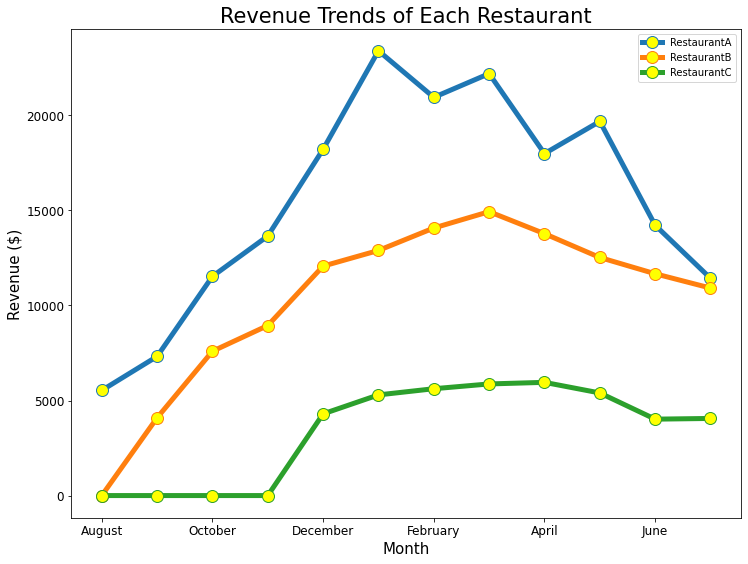

In [32]:
#Create a new dataframe showcasing individual revenue
df_resvsrev = df_numeric[['revenueA', 'revenueB', 'revenueC']]
df_resvsrev.columns = ['RestaurantA', 'RestaurantB', 'RestaurantC']

#Line graph of each restaurant's revenue
df_resvsrev.plot(kind='line', figsize=(12,9), linewidth=5, marker='o', markerfacecolor='yellow', markersize=12)

plt.title('Revenue Trends of Each Restaurant', fontsize=21)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Revenue ($)', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Findings and Implications

Unfortunately, the restaurants started using my delivery service at different times. With that disclaimer, it appears all restaurants saw a consistent growth in revenue until March, with a slight hiccup in February for restaurant A. Also a steep increase is seen in December for restaurants A and B. After March, however, restaurants saw a gradual decrease in their revenues.

This graph parallels the visualization of COVID cases in the Santa Clara county made by Johns Hopkins, which showed a steep increase in COVID cases from December to February then saw the number decline greatly onward. It seems there is a correlation between the number of COVID cases and the demand for food delivery. But there may be other factors influencing the business performance. Hence, the next section will look into customer service KPIs.

## B. Comparing Two Types of Customer Groups

In [33]:
#Create a new dataframe showcasing revenues between Repeaters and Non-Repeaters
df_repvsnonrep = df_numeric[['total_reprev', 'total_nonreprev']]
df_repvsnonrep.columns = ['Repeaters', 'Non-Repeaters']
df_repvsnonrep

,Repeaters,Non-Repeaters
August,1258.18,4274.52
September,3111.00,8300.17
October,7884.59,11240.08
November,9728.49,12870.79
December,14415.09,20170.30
January,20339.52,21248.97
February,21217.34,19427.64
March,23813.51,19190.93
April,24837.39,12885.33
May,23791.63,13814.65


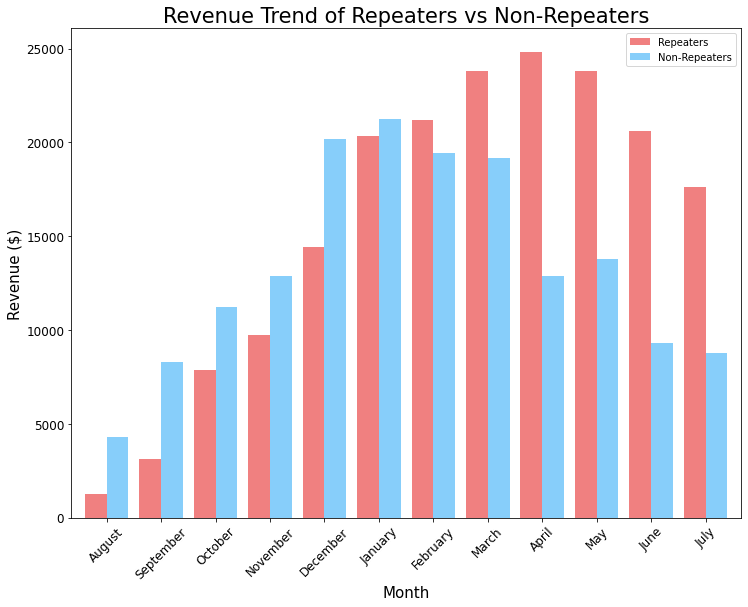

In [34]:
#Bar chart comparing the two groups
df_repvsnonrep.plot(kind='bar', figsize=(12,9), width=0.8, color=['lightcoral', 'lightskyblue'])

plt.title('Revenue Trend of Repeaters vs Non-Repeaters', fontsize=21)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Revenue ($)', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Both groups saw a consistent rise during the initial six months. The Non-Repeaters group reached their peak at the end of that period and would contribute to the majority of the sales up to that point. But the last six months show another story: majority of the sales came from existing customers. The Repeaters group reached their peak in April, whereas the Non-Repeaters group saw their greatest decrease that month. In addition, the Repeaters group had three months where their revenue exceeded the Non-Repeaters group's maximum. 

To put it simply, both groups saw a similar growth rate initially with the Repeaters group lagging by a month. Once the Non-Repeaters group reached its peak, the rates started to change drastically. 

Let's look into the distributions of each group to see the overall growth.


In [35]:
#Descriptive summary between the two groups
df_repvsnonrep.describe().round()

,Repeaters,Non-Repeaters
count,12.0,12.0
mean,15719.0,13458.0
std,8312.0,5478.0
min,1258.0,4275.0
25%,9268.0,9179.0
50%,18993.0,12878.0
75%,21861.0,19250.0
max,24837.0,21249.0


With brief examination, the Repeaters group spent more than the Non-Repeaters group overall. This is proven through comparing the mean, mid-quartile, and interquartile range. In fact, the Repeaters group's median is at the same level as the Non-Repeaters group's third quartile. Let's plot this subset for a visual sense of scale. 



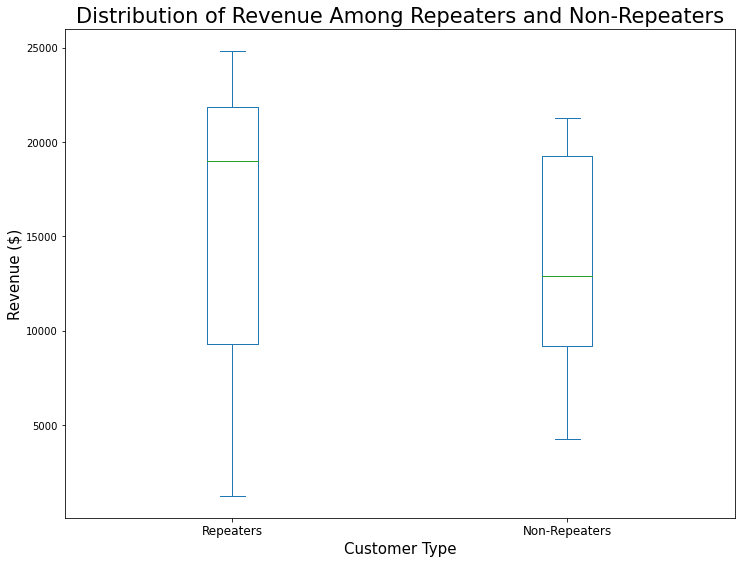

In [36]:
#Box chart comparing the two groups
df_repvsnonrep.plot(kind='box', figsize=(12,9))

plt.title('Distribution of Revenue Among Repeaters and Non-Repeaters', fontsize=21)
plt.xlabel('Customer Type', fontsize=15)
plt.ylabel('Revenue ($)', fontsize=15)
plt.xticks(fontsize=12)
plt.show()

The Repeaters group has a wider variability with higher highs and lower lows. The distributions for the Repeaters group and the Non-Repeaters groups are left-skewed and right-skewed, respectively. One way to interpret this is that existing customers, regardless of being a big spender or not, kept returning since they were satisfied with the service. To confirm this, calculating the customer retention rate will be useful to identify how often existing customers returned. 

In [37]:
#Find the customer retention rate
df_crr = df_numeric[['total_repct', 'total_nonrepct', 'total_deliveryct']]
CRR = []
for i in range(len(df_crr.index)):
    E = df_crr.iloc[i, 2]
    N = df_crr.iloc[i, 1]
    if i == 0:
        S = 0
    else:
        S = df_crr.iloc[i-1,2]
    CRR.append(((E-N)/S)*100)
    i = i + 1
CRR

C:\Users\hirok\AppData\Local\Temp\ipykernel_9824\2500606014.py:11: RuntimeWarning: divide by zero encountered in longlong_scalars
  CRR.append(((E-N)/S)*100)


[inf,
 73.33333333333333,
 58.415841584158414,
 59.07473309608541,
 58.80758807588076,
 61.01083032490975,
 54.480796586059746,
 60.02766251728907,
 57.38341968911917,
 61.35693215339233,
 53.857791225416044,
 57.25338491295938]

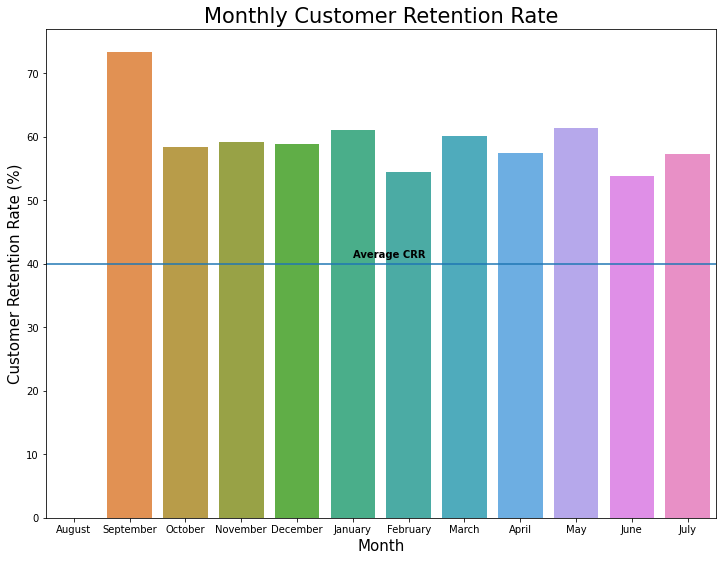

In [38]:
#Bar chart of the customer retention rate over a year
plt.figure(figsize=(12,9))

ax0 = sns.barplot(x=df_crr.index, y=CRR)
ax0.axhline(40)

plt.title('Monthly Customer Retention Rate', fontsize=21)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Customer Retention Rate (%)', fontsize=15)
plt.text(5, 41, "Average CRR", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

It appears 50–60% of existing customers continued to use the service. According to a report published by Metrilo, an E-commerce analytics company, the average customer retention rate for the meal delivery industry is roughly 40%. This is a great sign that the customers were satisfied with the delivery service such as on-time delivery and well-established communication channels.

#### Findings and Implications
    
If we combine the findings from current and previous sections, rise in COVID cases helped inject more first time customers to use the delivery service. And that momentum may have affected the growth rate within the Repeaters group. That growth was so profound that the delivery service was profitable even when COVID cases started to fall. However, the Repeaters group was not completely immune to it; May to June saw a steady decrease in revenue for both groups. 

There is one consistent trend to mention, which is the customer retention rate. More than half of the existing customers continued to use the delivery service throughout the whole period. To gain a better understanding of why this happened, the next section dives deeper into customer demographics based on zip codes and cities.

## Exploring Which Customer Behaviors Correlate to Delivery Demand


To prove if distance influenced the customer behavior, a visual map will be generated to get an idea of how far the zip codes are from the restaurants. 

In [39]:
#Assign variables for loop
zipunique = df['Zip_Code'].unique() 
ziplist = []
revenuezip = []

#Create a list of revenue respective to each zip code
for r in range(3):
    ziptest = df_res[r][['Zip_Code', 'Revenue']].groupby(['Zip_Code'], sort=False, as_index=True).sum() 
    ziplist.append(ziptest)
    revenuezip.append([])
    for x in zipunique:
        try:
            zc = ziplist[r].loc[x, 'Revenue']
        except:
            zc = 0
        finally:
            revenuezip[r].append(zc)

revenuezipA = revenuezip[0]
revenuezipB = revenuezip[1]
revenuezipC = revenuezip[2]
print(revenuezipA)
print(revenuezipB)
print(revenuezipC)

[47652.25, 27367.19, 6746.13, 309.87, 10435.12, 20433.62, 21947.59, 11072.59, 6855.67, 8292.37, 6005.85, 4023.87, 4067.52, 4503.5, 1921.12, 953.28, 474.28, 2867.84, 135.0, 61.0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 6639.21, 1258.48, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22958.75, 78.5, 0, 5363.39, 60341.62, 13727.09, 93.74, 8230.56, 4800.18]
[0, 0, 0, 0, 607.0, 134.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7130.4, 3035.5, 0, 1175.3, 20123.86, 4225.83, 1292.25, 2385.0, 407.5]


In [40]:
#Latitudes and longitudes for each zip code
X = [37.26, 37.30, 37.31, 37.34, 37.35, 37.31, 37.27, 37.28, 37.35, 37.22, 37.25, 37.29, 37.31, 37.32, 37.22, 37.35, 37.25, 37.34, 37.34, 37.32, 37.40, 37.37, 37.38, 37.38, 37.41, 37.37]
Y = [-122.02, -121.99, -121.96, -121.88, -121.98, -122.07, -121.95, -121.98, -121.95, -121.93, -121.91, -121.89, -121.94, -121.91, -121.98, -121.85, -121.88, -122.03, -122.10, -122.01, -122.07, -122.02, -122.01, -122.07, -122.01, -122.08]


In [41]:
#City for each zip code
City = ['Saratoga', 'San Jose', 'San Jose', 'San Jose', 'Santa Clara', 'Cupertino', 'Campbell', 'San Jose', 'Santa Clara', 'Los Gatos', 'San Jose', 'San Jose', 'San Jose', 'San Jose', 'Los Gatos', 'San Jose', 'San Jose', 'Sunnyvale', 'Los Altos', 'Cupertino', 'Mountain View', 'Sunnyvale', 'Sunnyvale', 'Mountain View', 'Sunnyvale', 'Mountain View']

In [42]:
#Create a DataFrame of zip codes and their respective revenues
df_zipcode = pd.DataFrame({'X':X, 'Y':Y,'revenuezipA':revenuezipA, 'revenuezipB':revenuezipB, 'revenuezipC':revenuezipC, 'City': City})
df_zipcode.index = df['Zip_Code'].unique()
df_zipcode.index.name = 'Zip_Code'
df_zipcode

,X,Y,revenuezipA,revenuezipB,revenuezipC,City
Zip_Code,,,,,,
95070,37.26,-122.02,47652.25,0.00,0.00,Saratoga
95129,37.30,-121.99,27367.19,0.00,0.00,San Jose
95117,37.31,-121.96,6746.13,0.00,0.00,San Jose
95112,37.34,-121.88,309.87,0.00,0.00,San Jose
95051,37.35,-121.98,10435.12,6639.21,607.00,Santa Clara
95014,37.31,-122.07,20433.62,1258.48,134.00,Cupertino
95008,37.27,-121.95,21947.59,0.00,0.00,Campbell
95130,37.28,-121.98,11072.59,0.00,0.00,San Jose
95050,37.35,-121.95,6855.67,0.00,0.00,Santa Clara


To avoid cluttering the map, there will be two maps: one for Restaurant A and another for Restaurants B and C. Restaurants B and C are located next to each other. 

In [43]:
#DataFrame of zipcodes and revenues for restaurant A
df_zipcodeA = df_zipcode[['revenuezipA', 'City']]
df_zipcodeA.sort_values(['revenuezipA'], ascending=False, inplace=True)
df_zipcodeA = df_zipcodeA[df_zipcodeA.revenuezipA != 0]
df_zipcodeA

C:\Users\hirok\AppData\Local\Temp\ipykernel_9824\299994595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zipcodeA.sort_values(['revenuezipA'], ascending=False, inplace=True)


,revenuezipA,City
Zip_Code,,
95070,47652.25,Saratoga
95129,27367.19,San Jose
95008,21947.59,Campbell
95014,20433.62,Cupertino
95130,11072.59,San Jose
95051,10435.12,Santa Clara
95032,8292.37,Los Gatos
95050,6855.67,Santa Clara
95117,6746.13,San Jose


In [44]:
#Find median and third quartile
print(df_zipcodeA.quantile([0.5, 0.75]))

      revenuezipA
0.50    5254.6750
0.75   10594.4875


In [45]:
#Find zip codes between median and third quartile
print(df_zipcodeA[(df_zipcodeA.revenuezipA >= 5254.68) & (df_zipcodeA.revenuezipA <= 10594.49)])

#Find zip codes above the third quartile
print(df_zipcodeA[df_zipcodeA.revenuezipA >= 10594.49])

          revenuezipA         City
Zip_Code                          
95051        10435.12  Santa Clara
95032         8292.37    Los Gatos
95050         6855.67  Santa Clara
95117         6746.13     San Jose
95124         6005.85     San Jose
          revenuezipA       City
Zip_Code                        
95070        47652.25   Saratoga
95129        27367.19   San Jose
95008        21947.59   Campbell
95014        20433.62  Cupertino
95130        11072.59   San Jose


To create the interactive map, a Python library, Folium, will be used. Each marker will show a popup chart when hovered over and indicate details like zip code and revenues. The chart will be created with HTML.


In [46]:
#Create a chart with HTML for the interactive maps
def popup_html(row):
    i = row
    zipcode_list=df_zipcode.index[i]
    restA_rev=df_zipcode['revenuezipA'].iloc[i] 
    restB_rev=df_zipcode['revenuezipB'].iloc[i]
    restC_rev= df_zipcode['revenuezipC'].iloc[i] 

    left_col_color = "#19a7bd"
    right_col_color = "#f2f0d3"
    
    html = """<!DOCTYPE html>
<html>
<head>
<h4 style="margin-bottom:10"; width="200px">{}</h4>""".format(zipcode_list) + """
</head>
    <table style="height: 126px; width: 350px;">
<tbody>
<tr>
<td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;">restA_rev</span></td>
<td style="width: 150px;background-color: """+ right_col_color +""";">{}</td>""".format(restA_rev) + """
</tr>
<tr>
<td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;">restB_rev</span></td>
<td style="width: 150px;background-color: """+ right_col_color +""";">{}</td>""".format(restB_rev) + """
</tr>
<tr>
<td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;">restC_rev</span></td>
<td style="width: 150px;background-color: """+ right_col_color +""";">{}</td>""".format(restC_rev) + """
</tr>


</tbody>
</table>
</html>
"""
    return html

In [47]:
#Map of Restaurant A's zip codes
restaurantA_map = folium.Map(location=(37.29, -121.99), zoom_start=12)
for i in range(0, len(df_zipcode)):
    zipcolor = df_zipcode.index[i]
    if zipcolor == 94043 or zipcolor == 94086 or zipcolor == 94085 or zipcolor == 94041 or zipcolor == 94089 or zipcolor == 94040 or zipcolor == 95086:
        color = 'gray'
    elif zipcolor == 95124 or zipcolor == 95117 or zipcolor == 95050 or zipcolor == 95032 or zipcolor == 95051:
        color = 'orange'
    elif zipcolor == 95130 or zipcolor == 95014 or zipcolor == 95008 or zipcolor ==95129 or zipcolor == 95070:
        color = 'green'
    else:
        color = 'red'
    html = popup_html(i)
    iframe = branca.element.IFrame(html=html,width=510, height=280)
    popup = folium.Popup(folium.Html(html, script=True), max_width=500)
    labels = df_zipcode['revenuezipA'].iloc[i]
    folium.Marker([df_zipcode['X'].iloc[i],df_zipcode['Y'].iloc[i]],popup=popup, icon=folium.Icon(color=color)).add_to(restaurantA_map)

#Create a separate marker for restaurant
folium.Marker([37.30048166903722, -121.98001258003093], popup='Restaurant A', icon=folium.Icon(color='blue', icon='home')).add_to(restaurantA_map)
restaurantA_map

The map is color-coded to show which zip codes performed well for the restaurant: 

- Blue: Restaurant's location
- Green: Zipcodes' revenues above the third quartile
- Orange: Zipcodes' revenues between median and third quartile
- Red: Zipcodes' revenues below the median

Restaurant A is located in San Jose. So a San Jose zip code yielding one of the highest revenues is expected. Surprisingly, distance does not play a significant role as initally thought. Instead the green markers are mostly concentrated on the West, South-West, and South of the restaurant, regardless of the distance. The orange markers are dispersed among several cities. There is more variability among the red markers and scattered throughout the entire map. 

In [48]:
df_zipcodeBC = df_zipcode[['revenuezipB', 'revenuezipC', 'City']]
df_zipcodeBC.sort_values(['revenuezipB'], ascending=False, inplace=True)
df_zipcodeBC = df_zipcodeBC[df_zipcodeBC.revenuezipB != 0]
df_zipcodeBC

C:\Users\hirok\AppData\Local\Temp\ipykernel_9824\1509733148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zipcodeBC.sort_values(['revenuezipB'], ascending=False, inplace=True)


,revenuezipB,revenuezipC,City
Zip_Code,,,
94086,60341.62,20123.86,Sunnyvale
94087,22958.75,7130.40,Sunnyvale
94085,13727.09,4225.83,Sunnyvale
94089,8230.56,2385.00,Sunnyvale
95051,6639.21,607.00,Santa Clara
94043,5363.39,1175.30,Mountain View
94040,4800.18,407.50,Mountain View
95014,1258.48,134.00,Cupertino
94041,93.74,1292.25,Mountain View


In [49]:
#Median and third quartile for restaurant B
print(df_zipcodeBC['revenuezipB'].quantile([0.5, 0.75]))

0.50     6001.3000
0.75    12352.9575
Name: revenuezipB, dtype: float64


In [50]:
#Median and third quartile for restaurant C
df_zipcodeBC.sort_values(['revenuezipC'], ascending=False, inplace=True)
print(df_zipcodeBC['revenuezipC'].quantile([0.5, 0.75]))

0.50    1838.6250
0.75    3928.2475
Name: revenuezipC, dtype: float64


C:\Users\hirok\AppData\Local\Temp\ipykernel_9824\535242698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zipcodeBC.sort_values(['revenuezipC'], ascending=False, inplace=True)


In [51]:
#Find zip codes between median and third quartile
print(df_zipcodeBC[(df_zipcodeBC.revenuezipB >= 6001.3) & (df_zipcodeBC.revenuezipB <= 12352.96) | (df_zipcodeBC.revenuezipC >= 1838.63) & (df_zipcodeBC.revenuezipC <= 3938.25)])

#Find zip codes above third quartile 
print(df_zipcodeBC[(df_zipcodeBC.revenuezipB >= 12352.96) | (df_zipcodeBC.revenuezipC >= 3928.25)])

          revenuezipB  revenuezipC         City
Zip_Code                                       
94024           78.50       3035.5    Los Altos
94089         8230.56       2385.0    Sunnyvale
95051         6639.21        607.0  Santa Clara
          revenuezipB  revenuezipC       City
Zip_Code                                     
94086        60341.62     20123.86  Sunnyvale
94087        22958.75      7130.40  Sunnyvale
94085        13727.09      4225.83  Sunnyvale


In [52]:
#Map of Restaurant B's and C's zipcodes
restaurantBC_map = folium.Map(location=(37.38, -122.05), zoom_start=12)
for i in range(0, len(df_zipcode)):
    zipcolor = df_zipcode.index[i]
    if zipcolor == 94041 or zipcolor == 94043 or zipcolor == 94040 or zipcolor == 95014:
        color='red'
    elif zipcolor == 95051 or zipcolor == 94089 or zipcolor == 94024:
        color='orange'
    elif zipcolor == 94085 or zipcolor == 94087 or zipcolor == 94086:
        color='green'
    else:
        color='gray'
    html = popup_html(i)
    iframe = branca.element.IFrame(html=html,width=510, height=280)
    popup = folium.Popup(folium.Html(html, script=True), max_width=500)
    labels = df_zipcode['revenuezipB'].iloc[i]
    folium.Marker([df_zipcode['X'].iloc[i],df_zipcode['Y'].iloc[i]],popup=popup, icon=folium.Icon(color=color)).add_to(restaurantBC_map)

#Create a marker for the restaurants
folium.Marker([37.37660853795109, -122.03134805309438], popup='Restaurants B and C', icon=folium.Icon(color='blue', icon='home')).add_to(restaurantBC_map)
restaurantBC_map

The distance seems to play a bigger factor for zip codes closer to the restaurants. But the significance of distance diminishes as it gets farther. For example, zip codes located in the same city as the restaurants saw the most revenue. Zip codes outside of the restaurants' city performed either fair or below average. 

#### Findings and Implications

Based on these two maps, the distance factor did not paint a clear picture of delivery demand. Yes, zip codes located in the same city as the restaurants did tend to aggregate more traction. But that statement's validity does not hold up once the zip codes are farther away. Clearly there are more variables influencing the demand. So the next area will look into four key customer demographics based on cities: population, percentage of teenagers and seniors, and average household income. To capture these information, data from cesus.gov, a dataset provided by the US Census Bureau, will be webscraped.

In [53]:
#Master DataFrame of cities
df_cities = df_zipcode.groupby(['City'])[['revenuezipA', 'revenuezipB', 'revenuezipC']].sum()
df_cities

,revenuezipA,revenuezipB,revenuezipC
City,,,
Campbell,21947.59,0.00,0.00
Cupertino,20494.62,1258.48,134.00
Los Altos,135.00,78.50,3035.50
Los Gatos,10213.49,0.00,0.00
Mountain View,0.00,10257.31,2875.05
San Jose,65524.08,0.00,0.00
Santa Clara,17290.79,6639.21,607.00
Saratoga,47652.25,0.00,0.00
Sunnyvale,2867.84,105258.02,33865.09


In [54]:
#Webscrape setup and parse
def webscrape_function(url, classname, i):
    """ Scrape the texts from the URL"""
    data = requests.get(url).text
    """Use Beautiful soup with lxml parser"""
    soup = BeautifulSoup(data, 'lxml')
    """Find the second table element"""
    table = soup.find_all('table')[1]
    return table 

In [55]:
#Webscrape setup for Campbell, Cupertino, Los Altos, Los Gatos, Mountain View, and San Jose (limit 6 cities)
table = webscrape_function('https://www.census.gov/quickfacts/fact/table/campbellcitycalifornia,cupertinocitycalifornia,losaltoscitycalifornia,losgatostowncalifornia,mountainviewcitycalifornia,sanjosecitycalifornia/PST045221', 'fact selected', 0)
print(table)

<table class="type" data-geospan="6">
<caption class="icon-user-3">People</caption>
<colgroup>
<col/>
<col/>
<col/>
<col/>
<col/>
<col/>
<col/>
</colgroup>
<tbody data-topic="Population">
<tr class="qf-header">
<th scope="col">Population</th>
<th data-geoid="0610345" data-shortname="campbellcitycalifornia" scope="col"><div class="qf-geobox"><span></span></div></th>
<th data-geoid="0617610" data-shortname="cupertinocitycalifornia" scope="col"><div class="qf-geobox"><span></span></div></th>
<th data-geoid="0643280" data-shortname="losaltoscitycalifornia" scope="col"><div class="qf-geobox"><span></span></div></th>
<th data-geoid="0644112" data-shortname="losgatostowncalifornia" scope="col"><div class="qf-geobox"><span></span></div></th>
<th data-geoid="0649670" data-shortname="mountainviewcitycalifornia" scope="col"><div class="qf-geobox"><span></span></div></th>
<th data-geoid="0668000" data-shortname="sanjosecitycalifornia" scope="col"><div class="qf-geobox"><span></span></div></th>
</t

In [56]:
#Create a list by specifying the correct element and split at ""
def scrape_and_split(classname, i):
    """scrape the first 'tr' element of a specific class"""
    summary = table.find_all('tr', class_=classname)[i].text
    """split the strings and skip the first index"""
    variablei = summary.split('')
    variable = variablei[1:]
    return variable

In [57]:
#List of population
population = scrape_and_split('fact selected', 0)
print(population)

['\n42,754\n\n\n', '\n58,622\n\n\n', '\n30,700\n\n\n', '\n32,538\n\n\n', '\n81,516\n\n\n', '\n983,489\n']


In [58]:
#Remove the "\n" and "," from the list
def comma_stripped_list(variable):
    variable_list = []
    """Remove unnecessary characters"""
    for v in variable:
        variable_list.append(v.strip())
        variable_list = [v.replace(',','') for v in variable_list]
    return variable_list

#Population list for the first six cities
population_list1 = comma_stripped_list(population)
print(population_list1)

['42754', '58622', '30700', '32538', '81516', '983489']


In [59]:
#List of teenager %
teenager = scrape_and_split('fact', 6)
print(teenager)

['\n21.4%\n\n\n', '\n26.1%\n\n\n', '\n25.5%\n\n\n', '\n21.7%\n\n\n', '\n20.2%\n\n\n', '\n22.0%\n']


In [60]:
#Remove the "\n" and "%" from the list
def pctsign_stripped_list(variable):
    variable_list = []
    """Remove unnecessary characters"""
    for v in variable:
        variable_list.append(v.strip())
        variable_list = [v.strip('%') for v in variable_list]
    return variable_list

#Teenager % list for the first six cities
teenager_list1 = pctsign_stripped_list(teenager)
print(teenager_list1)

['21.4', '26.1', '25.5', '21.7', '20.2', '22.0']


In [61]:
#Senior % for the first six cities
senior = scrape_and_split('fact', 7)
senior_list1 = pctsign_stripped_list(senior)
print(senior_list1)

['14.3', '14.5', '18.8', '20.9', '11.2', '13.0']


In [62]:
#Scrape average household income for the first six cities
def income_split(classname, i):
    """scrape the first 'tr' element of a specific class"""
    summary = table.find_all('tr', class_=classname)[i].text
    """specify where to split"""
    variablei = summary.split('')
    return variablei

#List of average household income
income = income_split('fact', -3)
print(income)

['\n\nMedian household income (in 2020 dollars), 2016-2020\n\n\n$122,644\n\n$182,857\n\n$240,094\n\n$156,270\n\n$144,116\n\n$117,324\n']


In [63]:
#Remove the "$", "\n", and "," from the list
def dollar_stripped_list(variable):
    variable_list = []
    """Remove the '$' character"""
    for v in variable:
        split_lines = v.split('$')
    dollar_gone = split_lines[1:]
    """Remove '\n' and ',' characters"""
    for d in dollar_gone:
        variable_list.append(d.strip())
        variable_list = [v.replace(',','') for v in variable_list]
    return variable_list

#Average household income list for the first six cities
income_list1 = dollar_stripped_list(income)
print(income_list1)

['122644', '182857', '240094', '156270', '144116', '117324']


In [64]:
#Webscrape for Santa Clara, Saratoga, and Sunnyvale
table = webscrape_function('https://www.census.gov/quickfacts/fact/table/santaclaracitycalifornia,saratogacitycalifornia,sunnyvalecitycalifornia/PST045221', 'fact selected', 0)
print(table)

<table class="type" data-geospan="3">
<caption class="icon-user-3">People</caption>
<colgroup>
<col/>
<col/>
<col/>
<col/>
</colgroup>
<tbody data-topic="Population">
<tr class="qf-header">
<th scope="col">Population</th>
<th data-geoid="0669084" data-shortname="santaclaracitycalifornia" scope="col"><div class="qf-geobox"><span></span></div></th>
<th data-geoid="0670280" data-shortname="saratogacitycalifornia" scope="col"><div class="qf-geobox"><span></span></div></th>
<th data-geoid="0677000" data-shortname="sunnyvalecitycalifornia" scope="col"><div class="qf-geobox"><span></span></div></th>
</tr>
<tr class="fact selected" data-mnemonic="PST045221" data-precision="0" data-unit="ABS" data-url="/quickfacts/fact/table/santaclaracitycalifornia,saratogacitycalifornia,sunnyvalecitycalifornia#">
<td>
<a class="quickinfo icon-info-circled-1" data-title="Population Estimates, July 1 2021, (V2021)" href="/quickfacts/note/PST045221" id="PST045221" tabindex="-1" title="Quick Info"></a><span>Popul

In [65]:
#Population list for the last three cities
population = scrape_and_split('fact selected', 0)
population_list2 = comma_stripped_list(population)
print(population_list2)

['127151', '30163', '152258']


In [66]:
#Teenager % list for the last three cities
teenager = scrape_and_split('fact', 6)
teenager_list2 = pctsign_stripped_list(teenager)
print(teenager_list2)

['19.4', '20.1', '20.9']


In [67]:
#Senior % list for the last three cities
senior = scrape_and_split('fact', 7)
senior_list2 = pctsign_stripped_list(senior)
print(senior_list2)

['11.1', '23.9', '11.9']


In [68]:
#Average household income list for the last three cities
income = income_split('fact', -3)
income_list2 = dollar_stripped_list(income)
print(income_list2)

['136870', '201046', '150464']


In [69]:
#Concatenate the cities
population_list = population_list1 + population_list2 
print("Population:", population_list)
teenager_list = teenager_list1 + teenager_list2
print("Teenager %:", teenager_list)
senior_list = senior_list1 + senior_list2
print("Senior %:", senior_list)
income_list = income_list1 + income_list2
print("Average household income:", income_list)

Population: ['42754', '58622', '30700', '32538', '81516', '983489', '127151', '30163', '152258']
Teenager %: ['21.4', '26.1', '25.5', '21.7', '20.2', '22.0', '19.4', '20.1', '20.9']
Senior %: ['14.3', '14.5', '18.8', '20.9', '11.2', '13.0', '11.1', '23.9', '11.9']
Average household income: ['122644', '182857', '240094', '156270', '144116', '117324', '136870', '201046', '150464']


In [70]:
#Add the new lists to df_cities 
df_cities['Population'] = population_list
df_cities['Teenager_Pct'] = teenager_list
df_cities['Senior_Pct'] = senior_list
df_cities['Household_Income'] = income_list
df_cities

,revenuezipA,revenuezipB,revenuezipC,Population,Teenager_Pct,Senior_Pct,Household_Income
City,,,,,,,
Campbell,21947.59,0.00,0.00,42754,21.4,14.3,122644
Cupertino,20494.62,1258.48,134.00,58622,26.1,14.5,182857
Los Altos,135.00,78.50,3035.50,30700,25.5,18.8,240094
Los Gatos,10213.49,0.00,0.00,32538,21.7,20.9,156270
Mountain View,0.00,10257.31,2875.05,81516,20.2,11.2,144116
San Jose,65524.08,0.00,0.00,983489,22.0,13.0,117324
Santa Clara,17290.79,6639.21,607.00,127151,19.4,11.1,136870
Saratoga,47652.25,0.00,0.00,30163,20.1,23.9,201046
Sunnyvale,2867.84,105258.02,33865.09,152258,20.9,11.9,150464


In [71]:
#Check the data types
df_cities.dtypes

revenuezipA         float64
revenuezipB         float64
revenuezipC         float64
Population           object
Teenager_Pct         object
Senior_Pct           object
Household_Income     object
dtype: object

In [72]:
#Convert all data types to float
df_cities = df_cities.astype(float)

In [73]:
#Check the updated data types
df_cities.dtypes

revenuezipA         float64
revenuezipB         float64
revenuezipC         float64
Population          float64
Teenager_Pct        float64
Senior_Pct          float64
Household_Income    float64
dtype: object

In [74]:
#Create a DataFrame showing restaurant A's revenue and mentioned variables
df_citiesA = df_cities[['revenuezipA', 'Population', 'Teenager_Pct', 'Senior_Pct', 'Household_Income']]
df_citiesA.sort_values(by='revenuezipA', ascending=False, inplace=True)
df_citiesA = df_citiesA[df_citiesA.revenuezipA != 0]
df_citiesA

C:\Users\hirok\AppData\Local\Temp\ipykernel_9824\3561549416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_citiesA.sort_values(by='revenuezipA', ascending=False, inplace=True)


,revenuezipA,Population,Teenager_Pct,Senior_Pct,Household_Income
City,,,,,
San Jose,65524.08,983489.0,22.0,13.0,117324.0
Saratoga,47652.25,30163.0,20.1,23.9,201046.0
Campbell,21947.59,42754.0,21.4,14.3,122644.0
Cupertino,20494.62,58622.0,26.1,14.5,182857.0
Santa Clara,17290.79,127151.0,19.4,11.1,136870.0
Los Gatos,10213.49,32538.0,21.7,20.9,156270.0
Sunnyvale,2867.84,152258.0,20.9,11.9,150464.0
Los Altos,135.00,30700.0,25.5,18.8,240094.0


In [75]:
#Correlation of population with revenue
df_citiesA['Population'].corr(df_citiesA['revenuezipA'])

0.7192522918257772

Population density seems like a good predictor variable for revenue.

In [76]:
#Correlation of teenagers % with revenue
df_citiesA['Teenager_Pct'].corr(df_citiesA['revenuezipA'])

-0.25185713789491976

Percentage of teenager is not a good predictor. 

In [77]:
#Correlation of seniors % with revenue
df_citiesA['Senior_Pct'].corr(df_citiesA['revenuezipA'])

0.0776143315671607

Percentage of seniors seems to have the weakest linear relationship so far. 

In [78]:
#Correlation of average household income with revenue
print(df_citiesA['Household_Income'].corr(df_citiesA['revenuezipA']))

-0.34518597088024333


Average household income also gave a frustrating result. 

In [79]:
#Create a DataFrame showing restaurant B's and C's revenues and mentioned variables
df_citiesBC = df_cities[['revenuezipB', 'revenuezipC', 'Population', 'Teenager_Pct', 'Senior_Pct', 'Household_Income']]
df_citiesBC.sort_values(by='revenuezipB', ascending=False, inplace=True)
df_citiesBC = df_citiesBC[df_citiesBC.revenuezipB != 0]
df_citiesBC

C:\Users\hirok\AppData\Local\Temp\ipykernel_9824\4082356599.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_citiesBC.sort_values(by='revenuezipB', ascending=False, inplace=True)


,revenuezipB,revenuezipC,Population,Teenager_Pct,Senior_Pct,Household_Income
City,,,,,,
Sunnyvale,105258.02,33865.09,152258.0,20.9,11.9,150464.0
Mountain View,10257.31,2875.05,81516.0,20.2,11.2,144116.0
Santa Clara,6639.21,607.00,127151.0,19.4,11.1,136870.0
Cupertino,1258.48,134.00,58622.0,26.1,14.5,182857.0
Los Altos,78.50,3035.50,30700.0,25.5,18.8,240094.0


In [80]:
#Correlation of revenues compared to other predictor variables
df_citiesBC.corr()

,revenuezipB,revenuezipC,Population,Teenager_Pct,Senior_Pct,Household_Income
revenuezipB,1.000000,0.993168,0.743018,-0.348718,-0.349004,-0.341974
revenuezipC,0.993168,1.000000,0.669742,-0.274640,-0.243577,-0.234856
Population,0.743018,0.669742,1.000000,-0.781251,-0.794828,-0.805523
Teenager_Pct,-0.348718,-0.274640,-0.781251,1.000000,0.848318,0.844394
Senior_Pct,-0.349004,-0.243577,-0.794828,0.848318,1.000000,0.998683
Household_Income,-0.341974,-0.234856,-0.805523,0.844394,0.998683,1.000000


Similar to restaurant A's result, population density has the highest correlation with revenue for restaurants B and C. However, the effect is less significant for restaurant C. Other predictor variables have relatively the same Pearson correlation coefficients. But they all have weak correlation with revenue. 

#### Overall Findings and Implications

There seems to only be a single factor that influences the restaurant's revenue, which is the city's population. Distance also plays a role but its significance varies. The closer the customer is to the restaurant, the more likely the customer will use the delivery service. As the distance becomes greater, the outcome is a gray area. The analysis looked into other possible variables, like age and average household income, but none of them had a strong effect. 

Knowing these variables would be useful when conceptualizing promotional offerings. The promotions could change based on the cities. For example, greater discounts for cities that do not perform well or assign more delivery drivers to high performing cities. 

# Conclusion

The nature of delivery demand is dependent on many factors: COVID cases, delivery service, and city's population density. Through this analysis, I realized there could have been ways to improve the delivery service. First, give more attention to first time customers by providing exclusive discounts or offerings. Second, introduce features to elevate the customer experience such as having the online ordering system save the returning customer's previous orders. Third, target certain cities with promotions rather than making it available to everyone. Even with all these healthy changes, however, it is questionable how profitable the service will be once COVID cases fall. Seems like the food delivery market is a seasonal market. 